# Model using data

fit some data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp



In [2]:
beta, gamma = [ 0.01, 0.1 ]
def SIR(t, y):
    (S, I, R) = y
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

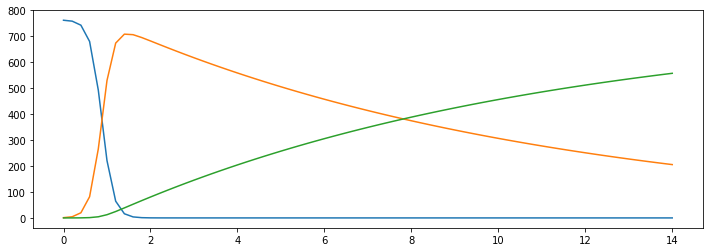

In [3]:
initial_conditions = [762, 1, 0]
sol = solve_ivp(SIR, [0, 14], initial_conditions, t_eval=np.arange(0, 14.2, 0.2))
fig = plt.figure(figsize=(12,4))
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.show()

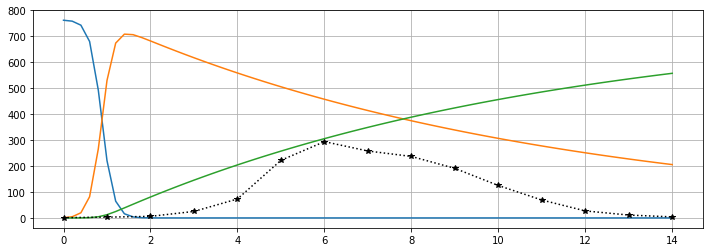

In [4]:
data = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
fig = plt.figure(figsize=(12,4))
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.plot(np.arange(0, 15), data, 'k*:')
plt.grid(True)
plt.show()

In [5]:
# ok, now let's find beta, gamma to match
# start by and error function
def sumsq(p):
    beta, gamma = p
    #step_size = 0.2
    #interval = int(1//step_size)
    def SIR(t, y):
        (S, I, R) = y
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    sol = solve_ivp(SIR, [0, 14], initial_conditions, t_eval=np.arange(0, 14.2, .2))
    return(sum((sol.y[1][::5] - data)**2))
        

In [6]:
# minimize the output
from scipy.optimize import minimize

msol = minimize(sumsq, [0.001, 1], method='Nelder-Mead')
msol.x

array([0.00218035, 0.44553886])

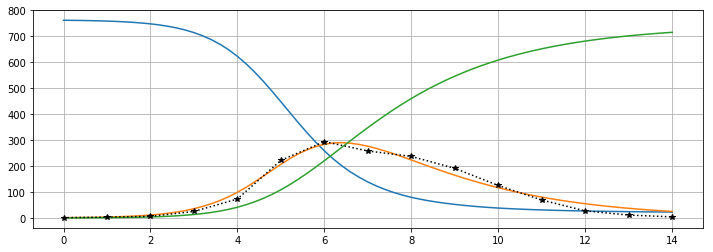

In [7]:
beta, gamma = msol.x
def SIR(t, y):
    (S, I, R) = y
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

sol = solve_ivp(SIR, [0, 14], initial_conditions, t_eval=np.arange(0, 14.2, 0.2))

fig = plt.figure(figsize=(12,4))
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[2])
plt.plot(np.arange(0, 15), data, 'k*:')
plt.grid(True)
plt.show()